from: http://webapp.inei.gob.pe:8080/sirtod-series/

# Imports & funcs

In [1]:
import numpy as np, pandas as pd, seaborn as sns, unidecode, math, rfpimp
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
df = pd.read_csv('data/processed/inei_series.csv', index_col='indicador', low_memory=False)

def get_data(variables):
    df_out = (df.loc[variables].
                 dropna(axis=1, how='all').
                 set_index(['ambito', 'unidad'], append=True).
                 stack().reset_index())
    df_out.columns = ['indicador', 'departamento', 'unidad', 'y', 'value']
    df_out.y = df_out.y.astype(int)
    return df_out

def plot_var_from(df, v, cols=6, fs=(13,6), plot_avg=True, sharey=True):
    avgs = df.loc[v].groupby('y')['value'].mean().reset_index()
    df_t = df.loc[v]
    u = df_t.unidad.iloc[0]
    ys = avgs.y.unique()
    years = ys
    ys = [*ys[::3], ys[-1]]
    ysl = [f'{e}'[2:] for e in ys]
    n = df_t.departamento.nunique()
    rows =  math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, sharey=sharey, sharex=True, figsize=(fs))
    for ax,dep in zip(axes.flatten(), df_t.departamento.unique()):
        df_dep = df_t[df_t.departamento == dep]
        if plot_avg: ax.plot(avgs.y, avgs.value, ':', color='gray')
        ax.plot(df_dep.y, df_dep.value, '-o', markersize=3, alpha=0.75)
        ax.set_title(dep)
        ax.set_xticks(ys)
        ax.set_xticklabels(ysl)
        
    for ax in axes.flatten()[len(df_t.departamento.unique()):]: ax.set_axis_off()

    # fig.suptitle(v.title().replace('_', ' '), fontsize=16, weight='bold')
    print(v.title().replace('_', ' '), f'({u}):')
    sns.despine()
    # plt.tight_layout(rect=(0, 0, 1, 0.95))
    plt.tight_layout()
    plt.show()
    print(f'Years: {", ".join(years.astype(str))}.')
    
def plot_var(v, **kwargs):
    plot_var_from(get_data(v).set_index('indicador'), v, **kwargs)
    
def plot_vars(vs, **kwargs):
    for i,e in enumerate(vs):
        plot_var(e, **kwargs)
        if i < len(vs)-1: print()

# Interesting vars

Nacimientos registrados
Tasa bruta de natalidad total de encuesta
Tasa de fecundidad total de 15 - 19 años
Tasa global de fecundidad
Tasa Total de mortalidad materna

Denuncias de violencia familiar con maltrato psicológico
Denuncias de violencia familiar por problemas conyugales y familiares
Denuncias de violencia familiar por problemas Económicos y de trabajo
Denuncias de violencia familiar por problemas de incompatibilidad de caracteres
Casos registrados por el Ministerio de la Mujer y Poblaciones Vulnerables, de violencia familiar y/o sexual contra el hombre
Casos registrados por el Ministerio de la Mujer y Poblaciones Vulnerables, de violencia familiar y/o sexual contra la mujer
Víctimas de feminicidio por pareja o ex-pareja
Víctimas de feminicidio por un familiar
Víctimas de feminicidio por otra persona

Total de establecimientos del Seguro Social de Salud
Hospitales del Seguro Social de Salud (EsSALUD)
Otros establecimientos del Seguro Social de Salud (EsSALUD)
Evolución de casos notificados de malaria
Casos notificados de tuberculosis

Hogares que tienen al menos una computadora a nivel nacional

Gasto Público por alumno en Educación Básica Alternativa
Gasto Público por alumno en Educación Básica Especial
Gasto Público por alumno en Educación Técnico Productiva

Variables de productos:
    Producción
    Superficie sembrada
    Superficie cosechada
    Rendimiento
    Precio en chacra
    
Superficie cosechada de coco
Rendimiento de coco
Precio en chacra de coco

Producción total de petróleo crudo
Producción total de líquidos de gas natural
Producción fiscalizada de gas natural
Regalías cobradas por explotación de petróleo crudo
Regalías cobradas por explotación de gas natural
Retribuciones pagadas por explotación de petróleo crudo

**Tasa de fecundidad general:** Número de nacimientos con vida por cada 1.000 mujeres de edades comprendidas entre los 15 y los 49 años, en un año dado.

**La tasa de mortalidad materna**: (MMRatio) es el número anual de muertes femeninas por cada 100,000 nacidos vivos por cualquier causa relacionada con o agravada por el embarazo o su manejo (excluyendo causas accidentales o incidentales). El MMRatio incluye las muertes durante el embarazo, el parto o dentro de los 42 días de la interrupción del embarazo, independientemente de la duración y el lugar del embarazo, durante un año específico.

In [4]:
[e for e in df.index.unique() if 'violencia' in e]

['denuncias_de_violencia_familiar_con_maltrato_psicologico',
 'denuncias_de_violencia_familiar_por_problemas_conyugales_y_familiares',
 'denuncias_de_violencia_familiar_por_problemas_economicos_y_de_trabajo',
 'denuncias_de_violencia_familiar_por_problemas_de_incompatibilidad_de_caracteres',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_el_hombre',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_la_mujer']

# fecundidad, mortalidad materna

Tasa Global De Fecundidad (Tasa):


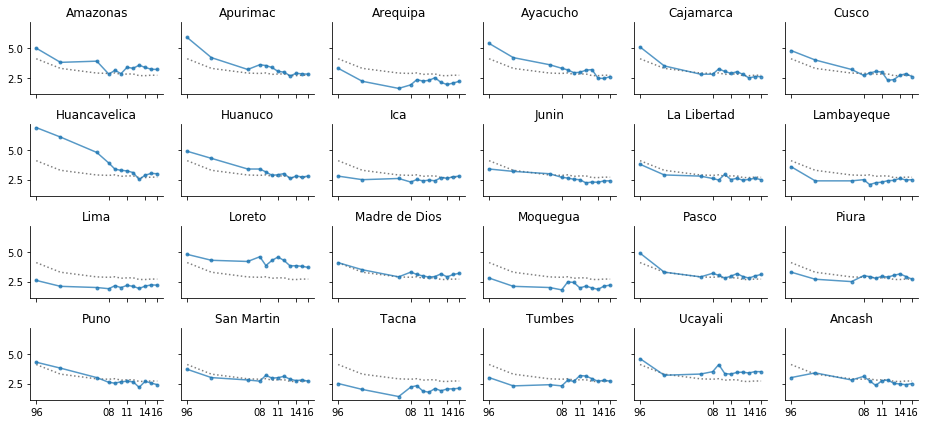

Years: 1996, 2000, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.

Tasa Total De Mortalidad Materna (Por 100 000 nacidos vivos):


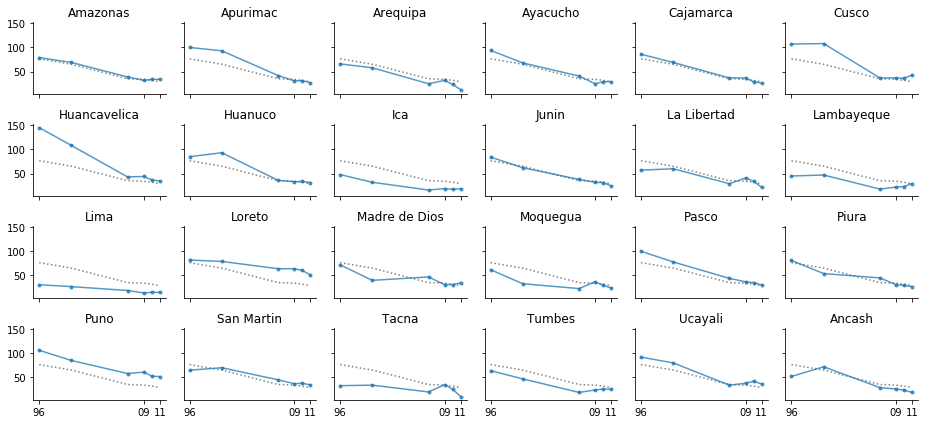

Years: 1996, 2000, 2007, 2009, 2010, 2011.


In [50]:
plot_vars(['tasa_global_de_fecundidad', 'tasa_total_de_mortalidad_materna'])

# violencia

In [3]:
vs = [e for e in df.index.unique() if 'violencia' in e or 'feminicidio' in e]; vs

['denuncias_de_violencia_familiar_con_maltrato_psicologico',
 'denuncias_de_violencia_familiar_por_problemas_conyugales_y_familiares',
 'denuncias_de_violencia_familiar_por_problemas_economicos_y_de_trabajo',
 'denuncias_de_violencia_familiar_por_problemas_de_incompatibilidad_de_caracteres',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_el_hombre',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_la_mujer',
 'victimas_de_feminicidio_por_pareja_o_ex-pareja',
 'victimas_de_feminicidio_por_un_familiar',
 'victimas_de_feminicidio_por_otra_persona']

Denuncias De Violencia Familiar Con Maltrato Psicologico (Casos registrados):


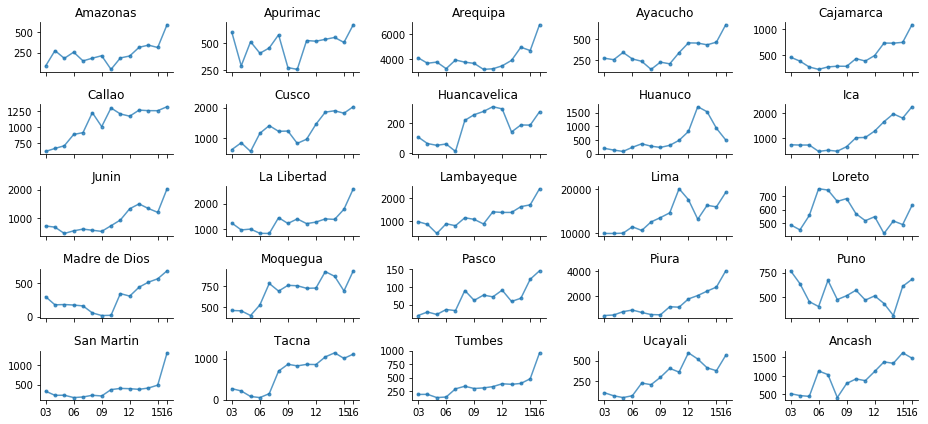

Years: 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.

Denuncias De Violencia Familiar Por Problemas Conyugales Y Familiares (Casos registrados):


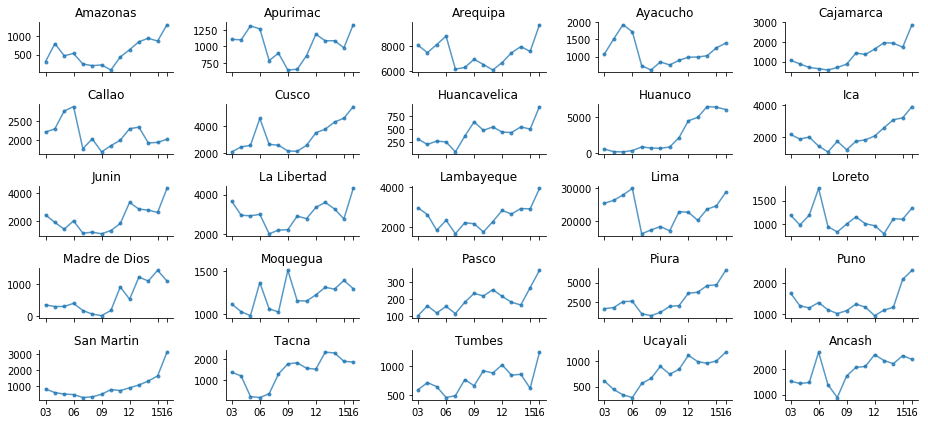

Years: 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.

Denuncias De Violencia Familiar Por Problemas Economicos Y De Trabajo (Casos registrados):


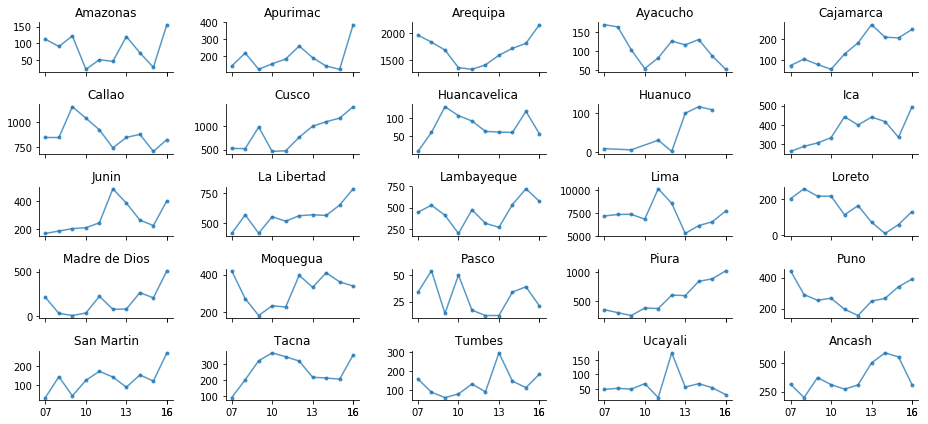

Years: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.

Denuncias De Violencia Familiar Por Problemas De Incompatibilidad De Caracteres (Casos registrados):


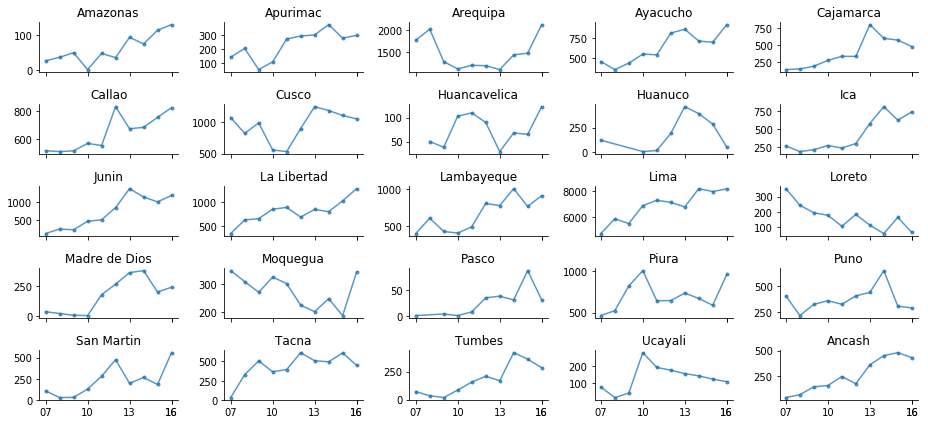

Years: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.

Casos Registrados Por El Ministerio De La Mujer Y Poblaciones Vulnerables, De Violencia Familiar Y/O Sexual Contra El Hombre (Casos registrados):


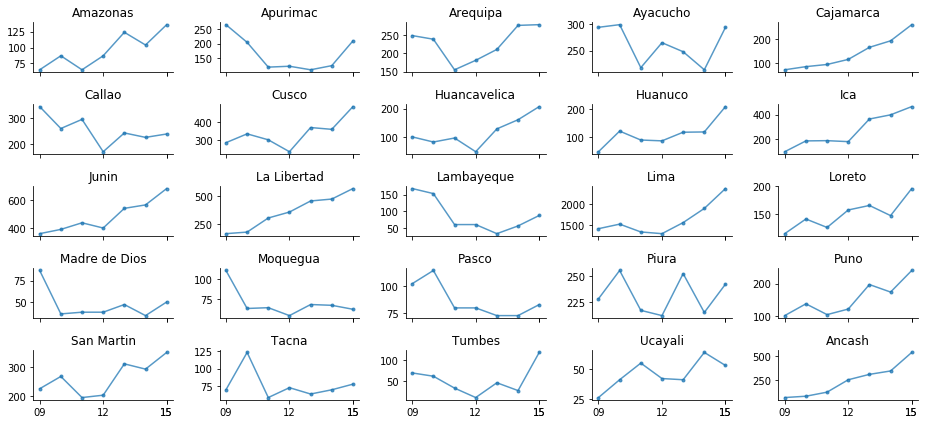

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015.

Casos Registrados Por El Ministerio De La Mujer Y Poblaciones Vulnerables, De Violencia Familiar Y/O Sexual Contra La Mujer (Casos registrados):


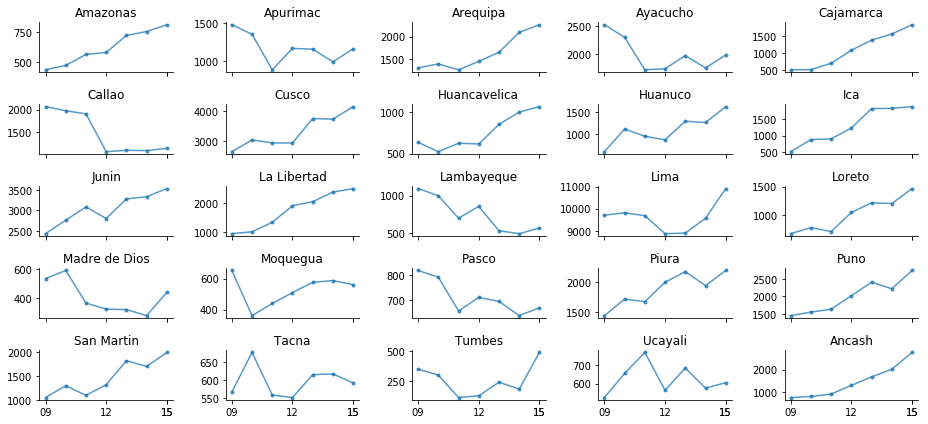

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015.

Victimas De Feminicidio Por Pareja O Ex-Pareja (Casos registrados):


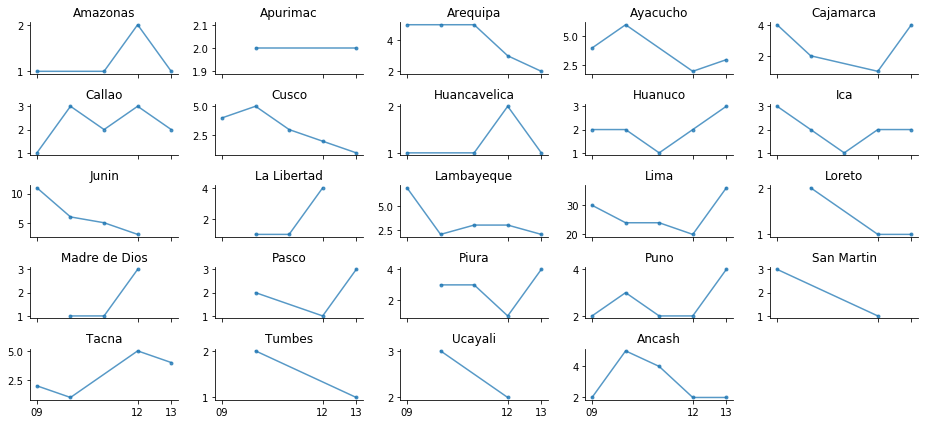

Years: 2009, 2010, 2011, 2012, 2013.

Victimas De Feminicidio Por Un Familiar (Casos registrados):


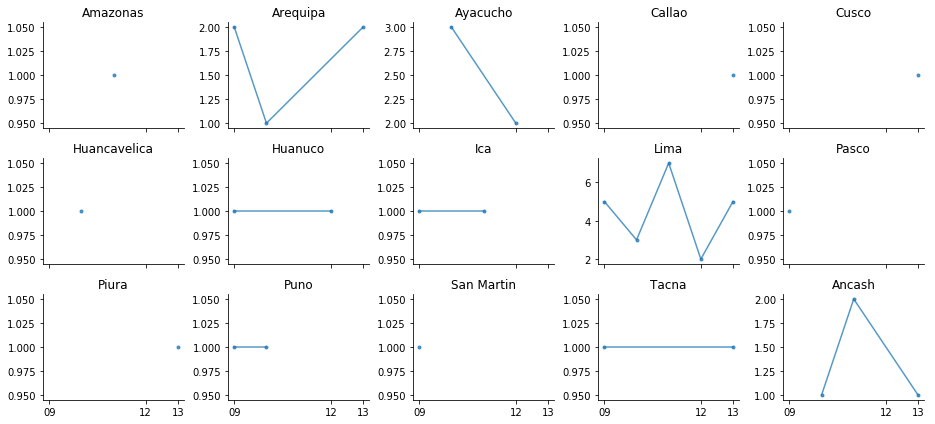

Years: 2009, 2010, 2011, 2012, 2013.

Victimas De Feminicidio Por Otra Persona (Casos registrados):


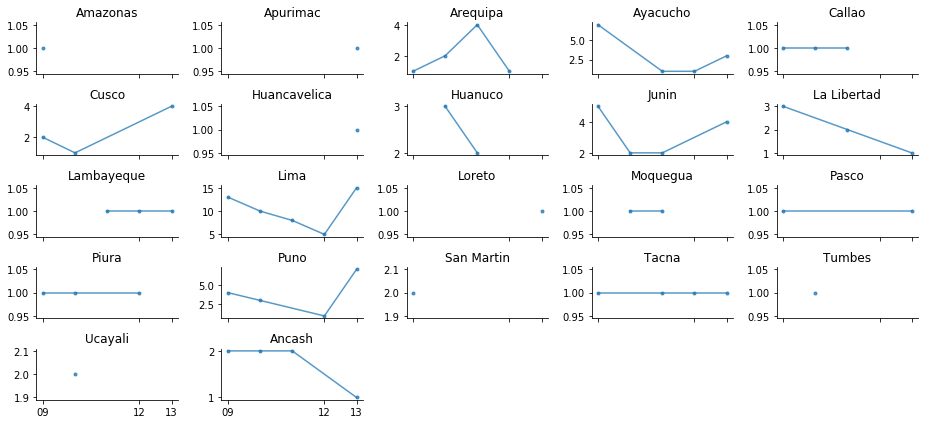

Years: 2009, 2010, 2011, 2012, 2013.


In [4]:
plot_vars(vs, cols=5, plot_avg=False, sharey=False)

In [69]:
dff = df.reset_index()

In [80]:
dff.indicador.nunique()

491

In [93]:
dff.indicador[~dff.indicador.str.contains(r'produccion|precio|sueldo|superficie|rendimiento')].nunique()

181

In [113]:
df = df.reset_index()

In [120]:
dff = (df[~df.indicador.str.contains(r'produccion|precio|sueldo|superficie|rendimiento|poblacion|ministerio|nacimientos')].
       drop_duplicates(['ambito', 'indicador']).
       drop('unidad', axis=1).
       set_index(['ambito', 'indicador']).
       unstack().
       dropna(axis=1, how='all'))
dff.shape

(25, 1425)

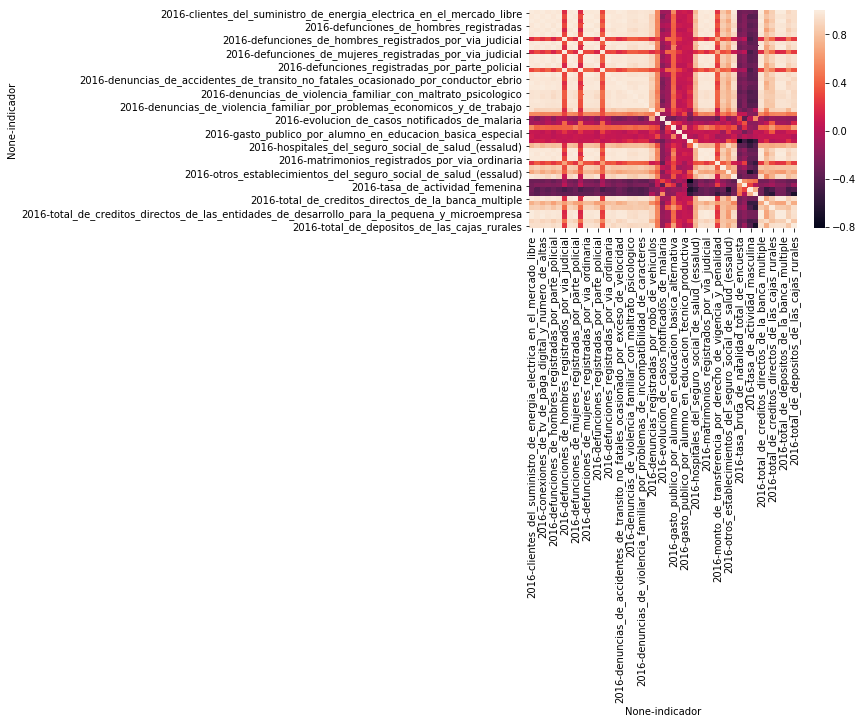

In [126]:
aa = dff.loc[:,['2016']]
sns.heatmap(aa.corr())

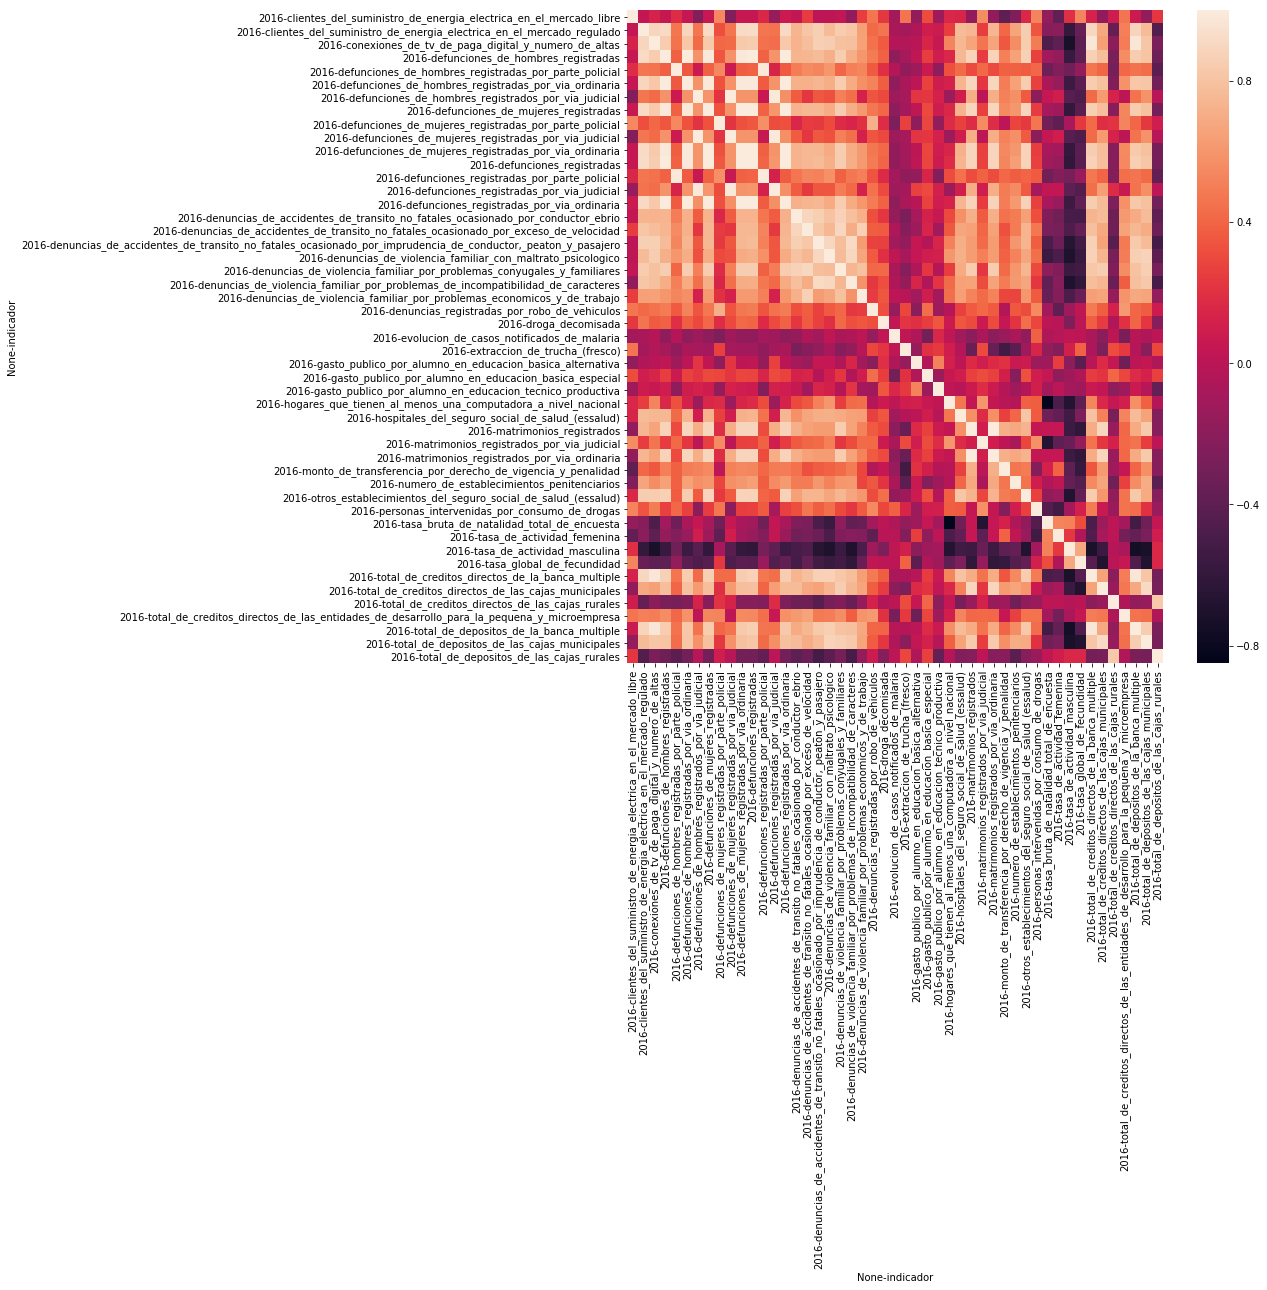

In [121]:
a = rfpimp.feature_corr_matrix(dff.loc[:,['2016']])

plt.figure(figsize=(12,12))
sns.heatmap(a)

In [64]:
a.loc['2016', '2016']

indicador,clientes_del_suministro_de_energia_electrica_en_el_mercado_libre,clientes_del_suministro_de_energia_electrica_en_el_mercado_regulado,conexiones_de_tv_de_paga_digital_y_numero_de_altas,defunciones_de_hombres_registradas,defunciones_de_hombres_registradas_por_parte_policial,defunciones_de_hombres_registradas_por_via_ordinaria,defunciones_de_hombres_registrados_por_via_judicial,defunciones_de_mujeres_registradas,defunciones_de_mujeres_registradas_por_parte_policial,defunciones_de_mujeres_registradas_por_via_judicial,...,tasa_de_actividad_femenina,tasa_de_actividad_masculina,tasa_global_de_fecundidad,total_de_creditos_directos_de_la_banca_multiple,total_de_creditos_directos_de_las_cajas_municipales,total_de_creditos_directos_de_las_cajas_rurales,total_de_creditos_directos_de_las_entidades_de_desarrollo_para_la_pequena_y_microempresa,total_de_depositos_de_la_banca_multiple,total_de_depositos_de_las_cajas_municipales,total_de_depositos_de_las_cajas_rurales
indicador,,,,,,,,,,,,,,,,,,,,,
clientes_del_suministro_de_energia_electrica_en_el_mercado_libre,1.0000,0.0335,0.1278,0.0539,0.1831,0.0400,-0.2404,0.0554,0.5434,-0.2404,...,-0.3847,0.1952,0.5242,0.1267,-0.1756,0.0893,0.4609,0.0735,-0.1690,0.2233
clientes_del_suministro_de_energia_electrica_en_el_mercado_regulado,0.0335,1.0000,0.8985,0.9200,0.4670,0.8962,0.4660,0.9192,0.3186,0.4660,...,-0.1992,-0.5954,-0.3569,0.9015,0.6808,-0.3577,0.5062,0.8877,0.7685,-0.4485
conexiones_de_tv_de_paga_digital_y_numero_de_altas,0.1278,0.8985,1.0000,0.8469,0.4520,0.8262,0.4283,0.8400,0.4141,0.4283,...,-0.3985,-0.7200,-0.4005,0.9731,0.6408,-0.1915,0.4985,0.9731,0.8162,-0.2746
defunciones_de_hombres_registradas,0.0539,0.9200,0.8469,1.0000,0.3804,0.9954,0.5862,0.9915,0.3444,0.5862,...,-0.1562,-0.5677,-0.4002,0.8638,0.7823,-0.2685,0.5608,0.8469,0.8115,-0.3292
defunciones_de_hombres_registradas_por_parte_policial,0.1831,0.4670,0.4520,0.3804,1.0000,0.3511,0.0742,0.3831,0.5404,0.0742,...,-0.2406,-0.3145,-0.1659,0.4701,0.4073,-0.2876,0.4142,0.4551,0.4362,-0.4039
defunciones_de_hombres_registradas_por_via_ordinaria,0.0400,0.8962,0.8262,0.9954,0.3511,1.0000,0.5862,0.9846,0.3356,0.5862,...,-0.1531,-0.5523,-0.4013,0.8454,0.7923,-0.2454,0.5823,0.8246,0.8162,-0.3015
defunciones_de_hombres_registrados_por_via_judicial,-0.2404,0.4660,0.4283,0.5862,0.0742,0.5862,1.0000,0.5931,0.2083,1.0000,...,0.1036,-0.4244,-0.4657,0.4233,0.6224,0.1317,0.0166,0.4545,0.5827,-0.0108
defunciones_de_mujeres_registradas,0.0554,0.9192,0.8400,0.9915,0.3831,0.9846,0.5931,1.0000,0.3294,0.5931,...,-0.1154,-0.5992,-0.4202,0.8569,0.7800,-0.2192,0.5377,0.8415,0.7977,-0.2938
defunciones_de_mujeres_registradas_por_parte_policial,0.5434,0.3186,0.4141,0.3444,0.5404,0.3356,0.2083,0.3294,1.0000,0.2083,...,-0.3898,-0.0827,0.2317,0.4276,0.1863,0.2082,0.5303,0.4056,0.2290,0.0962
